In [1]:
pip install dearpygui 

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.7 MB 6.7 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 12.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 12.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy 

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.2 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 61.2/61.2 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
    --------------------------------------- 0.3/15.8 MB 7.7 MB/s eta 0:00:03
   - -------------------------------------- 0.8/15.8 MB 9.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.5/15.8 MB 13.8 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/15.8 MB 14.2 MB/s eta 0:00:01
   ------ --------------------------------- 2.6/15.8 MB 13.8 MB/s eta 0:00:01
   --------- ------------------------------ 3.6/15.8 MB 14.3 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/15.8 MB 14.9 MB/s eta 0:00:01
   ------------ --------------------------- 5.0/15.8 MB 15.8 MB/s eta 0:00:01
   -------------- ------------------------- 5.9/15.8 MB 16.3 MB/s eta 0:00:0

In [9]:
import numpy as np
len(np.linspace(-10,10))

50

In [6]:
import dearpygui.dearpygui as dpg 
print(dpg.mvFontAtlas)

2


In [21]:
import numpy as np 
a = np.zeros((11,11))
b = np.linspace(0,1,11)[np.newaxis]
b = b.transpose()
c = np.append(a,b,axis=1)
print(c)


[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.7]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


In [22]:
pip install zhinst

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.6 MB 12.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/9.6 MB 11.7 MB/s eta 0:00:01
   ----- ---------------------------------- 1.4/9.6 MB 12.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.6 MB 12.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.6 MB 11.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.6 MB 11.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.6 MB 10.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.6 MB 10.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.6 MB 10.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.1/9.6 MB 10.2 MB/s eta 0:00:01
   ------

In [1]:
from zhinst.toolkit import Session
session = Session("localhost",hf2=True)

In [2]:
session.debug.level()

4

In [3]:
session.devices.visible()

['DEV561']

In [4]:
session.devices.connected()

[]

In [5]:
device = session.connect_device("DEV561")

In [6]:
list(device.child_nodes())

[/dev561/clockbase,
 /dev561/system,
 /dev561/features,
 /dev561/status,
 /dev561/stats,
 /dev561/demods,
 /dev561/oscs,
 /dev561/mods,
 /dev561/plls,
 /dev561/pids,
 /dev561/sigins,
 /dev561/sigouts,
 /dev561/scopes,
 /dev561/dios,
 /dev561/auxins,
 /dev561/auxouts,
 /dev561/cpus,
 /dev561/zctrls]

In [7]:
device.demods[0].enable(1)
device.demods[0].enable()



1

In [25]:
import time
device.demods[0].sample.subscribe()
time.sleep(1)
device.demods[0].sample.unsubscribe()
poll_result = session.poll()
demod_sample = poll_result[device.demods[0].sample]

In [26]:
import numpy as np 
np.sqrt(demod_sample['x']**2+demod_sample['y']**2)

array([3.29482183e-06, 3.82193580e-06, 3.41531953e-06, 4.09778766e-06,
       3.27870574e-06, 3.26190317e-06, 6.89019512e-06, 9.59027689e-07,
       2.68524227e-06, 4.51949892e-06, 4.71969367e-07, 4.47251225e-06,
       2.74832832e-06, 4.19233385e-06, 3.99482729e-06, 4.63463721e-06,
       3.53474746e-06, 3.39735922e-06, 3.61048016e-06, 2.01119667e-06,
       3.30455285e-06, 4.80452495e-06, 3.43284881e-06, 4.91912988e-06,
       4.31341771e-06, 3.08855792e-06, 4.42553461e-06, 4.10862743e-06,
       5.54453492e-06, 3.10884069e-06, 4.26467217e-06, 2.75772787e-06,
       1.09248261e-06, 2.74913431e-06, 3.67647115e-06, 4.45904187e-06,
       2.23285035e-06, 4.54960243e-06, 3.03150474e-06, 5.27140013e-06,
       2.17333489e-06, 5.69111532e-06, 5.45859580e-06, 4.73081463e-06,
       2.26867400e-06, 4.85311583e-06, 2.19639716e-06, 1.83723678e-06,
       4.07985630e-06, 3.38083513e-06, 4.71667073e-06, 3.33075922e-06,
       3.49239378e-06, 3.91954541e-06, 5.90073164e-06, 4.87784010e-06,
      

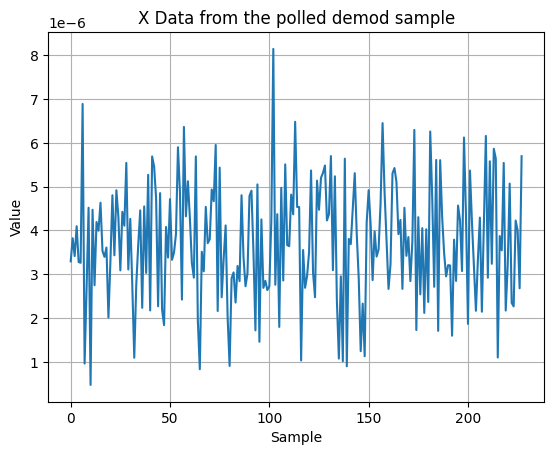

In [27]:
import matplotlib.pyplot as plt

_, axis = plt.subplots(1, 1)
axis.plot(np.sqrt(demod_sample['x']**2+demod_sample['y']**2))
axis.grid(True)
axis.set_title("X Data from the polled demod sample")
axis.set_xlabel("Sample")
axis.set_ylabel("Value")
plt.show()

